# **Coders Cave - Data Science Internship**
# **Phase 2:**
# **TASK 2 - Speech Emotion Recognition**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

#### Dataset link :- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

### Importing the neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

warnings.filterwarnings("ignore")

### Loading datasets and Defining thier path

In [2]:
Crema = "/kaggle/input/speech-emotion-recognition-en/Crema"
Ravdess = "/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24"
Savee = "/kaggle/input/speech-emotion-recognition-en/Savee"
Tess = "/kaggle/input/speech-emotion-recognition-en/Tess"

In [29]:
# Ravdess DataSet
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  surprised  /kaggle/input/speech-emotion-recognition-en/Ra...
1    neutral  /kaggle/input/speech-emotion-recognition-en/Ra...
2  disgusted  /kaggle/input/speech-emotion-recognition-en/Ra...
3  disgusted  /kaggle/input/speech-emotion-recognition-en/Ra...
4    neutral  /kaggle/input/speech-emotion-recognition-en/Ra...

In [4]:
Ravdess_df["Emotions"].value_counts()

Emotions
surprised    192
disgusted    192
fear         192
sad          192
calm         192
happy        192
angry        192
neutral       96
Name: count, dtype: int64

In [5]:
# Crema-D DataSet
crema_dir = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_dir:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')[0]
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)


Crema_df.head()

Emotions                                               Path
0  Unknown  /kaggle/input/speech-emotion-recognition-en/Cr...
1  Unknown  /kaggle/input/speech-emotion-recognition-en/Cr...
2  Unknown  /kaggle/input/speech-emotion-recognition-en/Cr...
3  Unknown  /kaggle/input/speech-emotion-recognition-en/Cr...
4  Unknown  /kaggle/input/speech-emotion-recognition-en/Cr...

In [6]:
Crema_df["Emotions"].value_counts()

Emotions
Unknown    7442
Name: count, dtype: int64

In [7]:
# Savee DataSet
directory_list = next(os.walk(Savee))
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee)
    for file in actor:
        file_emotion.append(file[:-6])
        file_path.append(Savee+ file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0     JE_h  /kaggle/input/speech-emotion-recognition-en/Sa...
1     KL_f  /kaggle/input/speech-emotion-recognition-en/Sa...
2     DC_h  /kaggle/input/speech-emotion-recognition-en/Sa...
3     DC_d  /kaggle/input/speech-emotion-recognition-en/Sa...
4     KL_a  /kaggle/input/speech-emotion-recognition-en/Sa...

In [8]:
Savee_df.Emotions.value_counts()

Emotions
DC_n     90
JK_n     90
JE_n     90
KL_n     90
JE_h     45
KL_d     45
JE_su    45
JK_f     45
DC_su    45
JE_a     45
JK_d     45
JE_sa    45
KL_su    45
DC_sa    45
JK_sa    45
DC_a     45
JE_d     45
KL_f     45
KL_sa    45
DC_f     45
JK_a     45
JK_su    45
KL_h     45
JE_f     45
KL_a     45
DC_d     45
DC_h     45
JK_h     45
Name: count, dtype: int64

In [9]:
#Tess dataset
directory_list = next(os.walk(Tess))
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Tess)
    for file in actor:
        file_emotion.append(file[:-6])
        file_path.append(Tess+ file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Tess_df = pd.concat([emotion_df, path_df], axis=1)

Tess_df.head()

Emotions                                               Path
0       YA  /kaggle/input/speech-emotion-recognition-en/Te...
1      OAF  /kaggle/input/speech-emotion-recognition-en/Te...
2       OA  /kaggle/input/speech-emotion-recognition-en/Te...
3    OAF_d  /kaggle/input/speech-emotion-recognition-en/Te...
4    OAF_n  /kaggle/input/speech-emotion-recognition-en/Te...

### Concatinating all datasets

In [10]:
df = pd.concat([Ravdess_df, Crema_df, Savee_df, Tess_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  surprised  /kaggle/input/speech-emotion-recognition-en/Ra...
1    neutral  /kaggle/input/speech-emotion-recognition-en/Ra...
2  disgusted  /kaggle/input/speech-emotion-recognition-en/Ra...
3  disgusted  /kaggle/input/speech-emotion-recognition-en/Ra...
4    neutral  /kaggle/input/speech-emotion-recognition-en/Ra...

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df["Emotions"].value_counts()

Emotions
Unknown             7442
surprised            192
disgusted            192
fear                 192
sad                  192
calm                 192
happy                192
angry                192
neutral               96
JE_n                  90
JK_n                  90
KL_n                  90
DC_n                  90
KL_su                 45
JK_sa                 45
DC_sa                 45
DC_su                 45
JE_sa                 45
JK_d                  45
JE_a                  45
JK_f                  45
JE_su                 45
JK_h                  45
KL_d                  45
JE_d                  45
DC_a                  45
KL_a                  45
KL_sa                 45
JE_h                  45
KL_f                  45
DC_d                  45
DC_h                  45
JE_f                  45
KL_h                  45
JK_su                 45
JK_a                  45
DC_f                  45
OAF                    6
YAF                    6
YAF_d           

### Data Visualization through Audio Waves

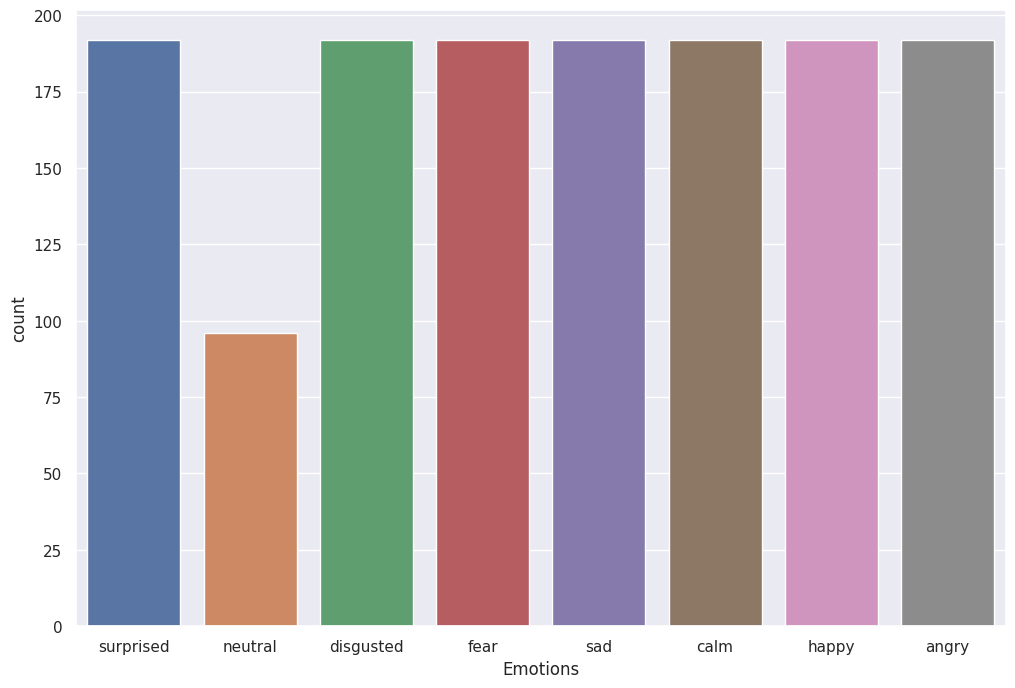

In [34]:
sns.countplot(data= Ravdess_df, x="Emotions")
plt.show()

In [13]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [14]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

### Disgust Emotion Waves

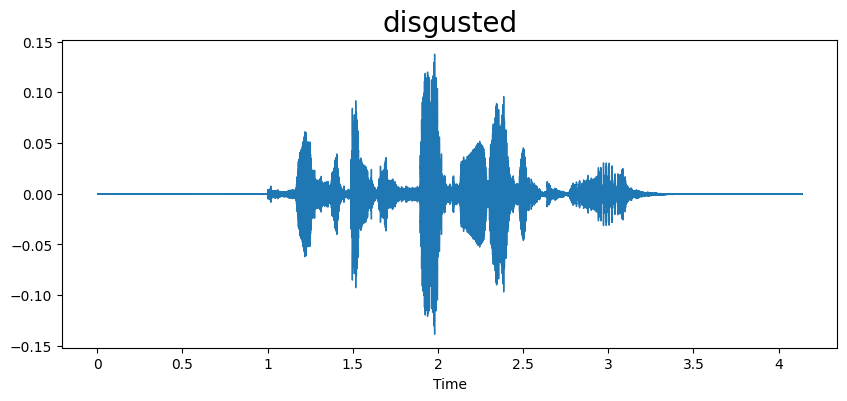

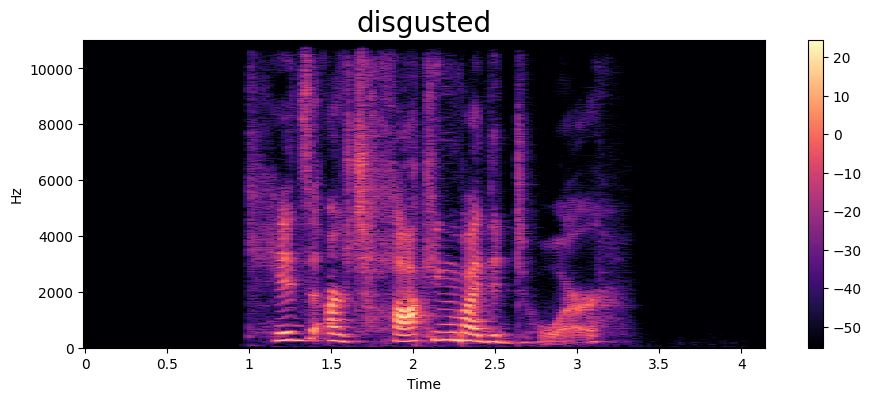

In [15]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Sadness Emotion Waves

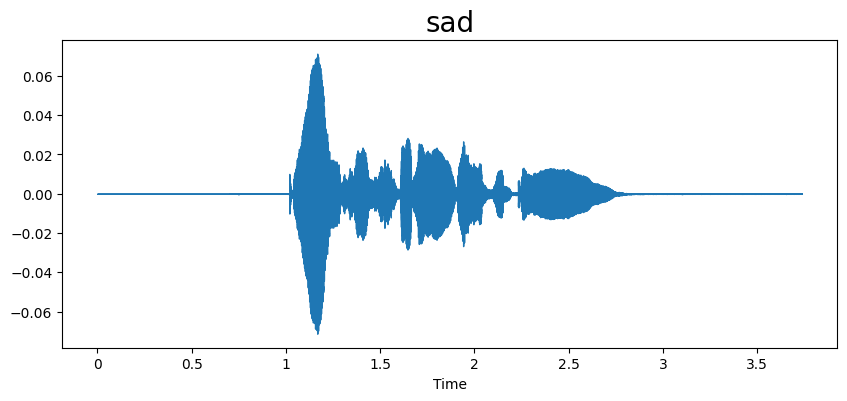

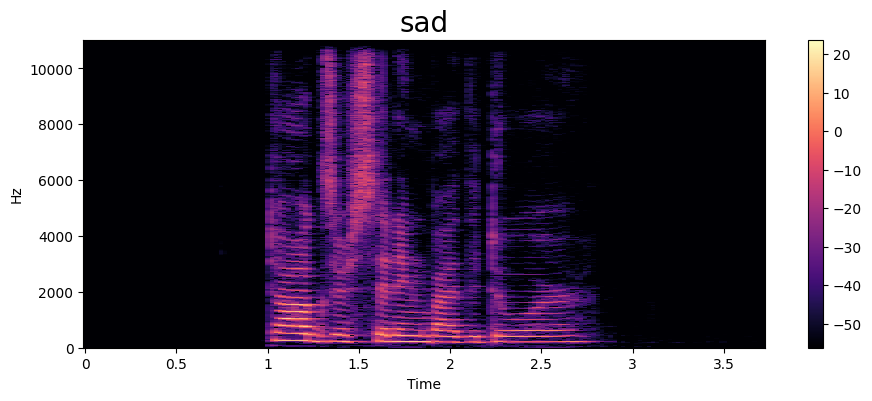

In [16]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Happiness Emotion Waves

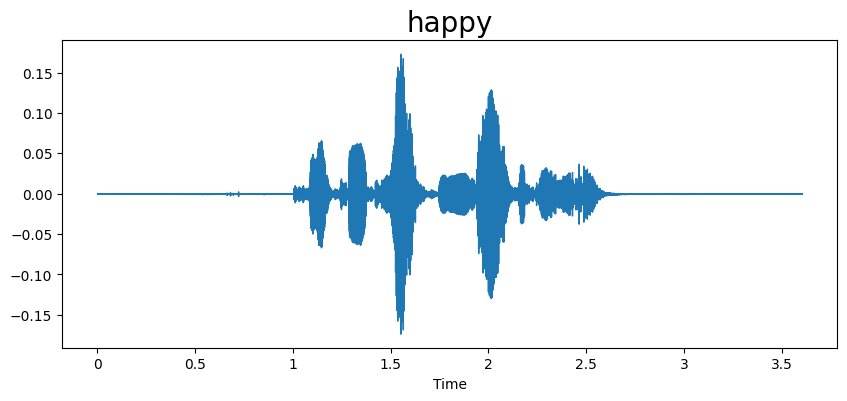

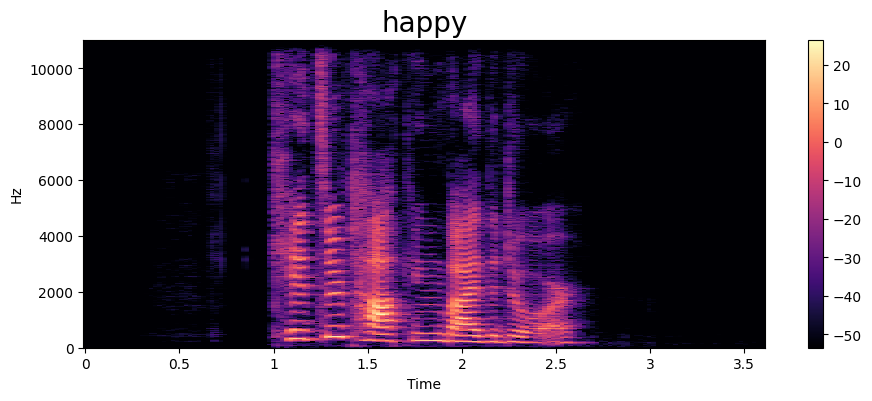

In [17]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Angry Emotion Waves

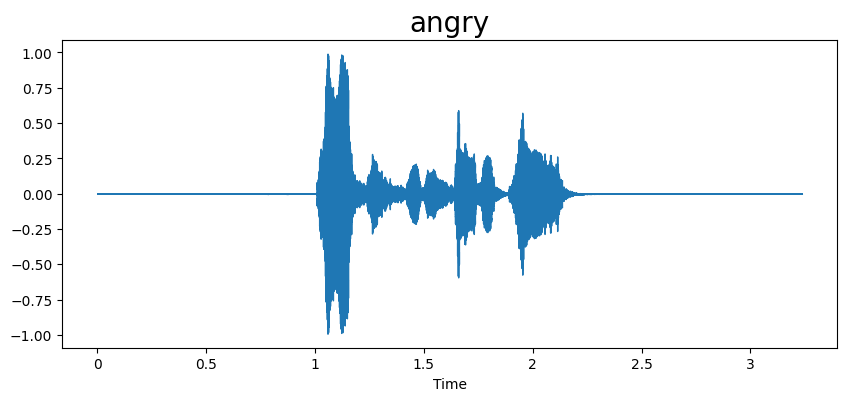

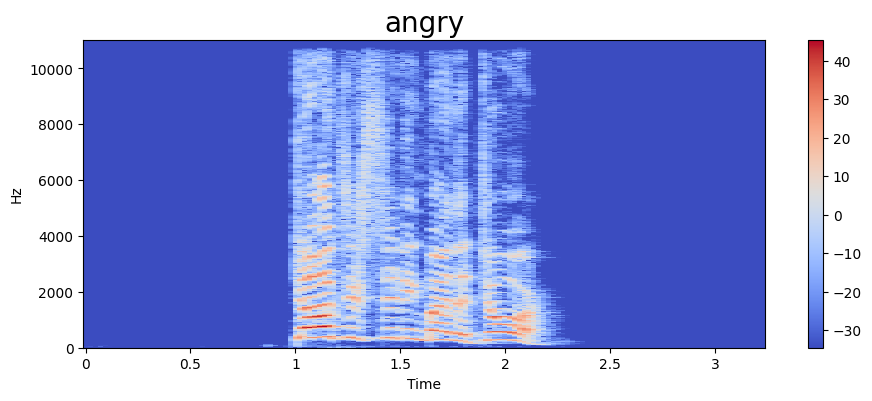

In [18]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Neutral Emotion Waves

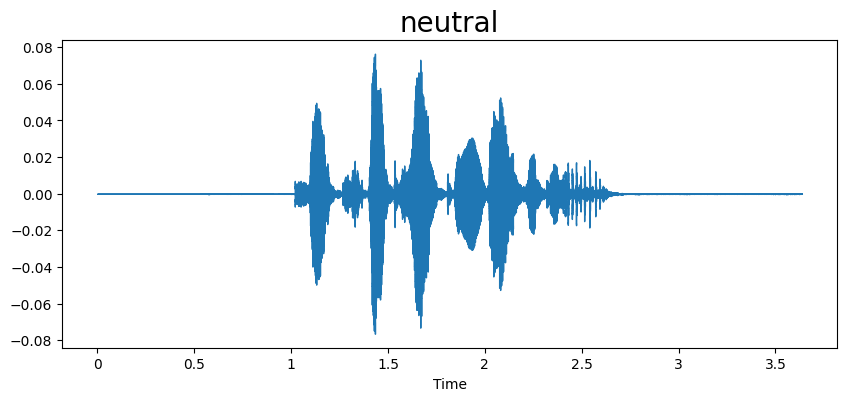

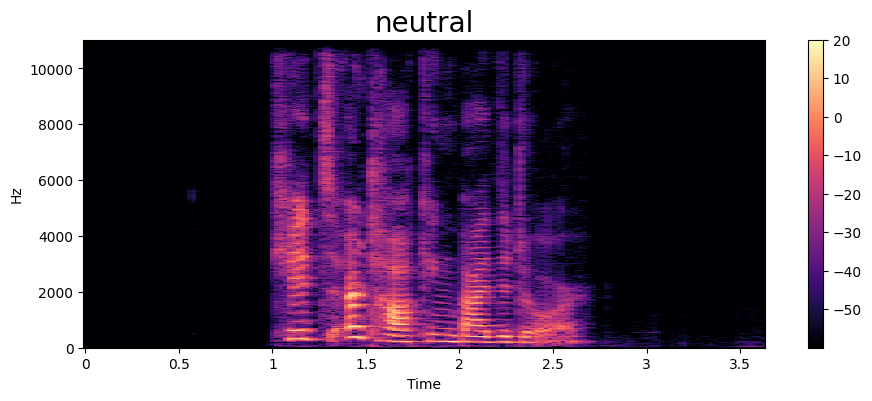

In [19]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Surprise Emotion Waves

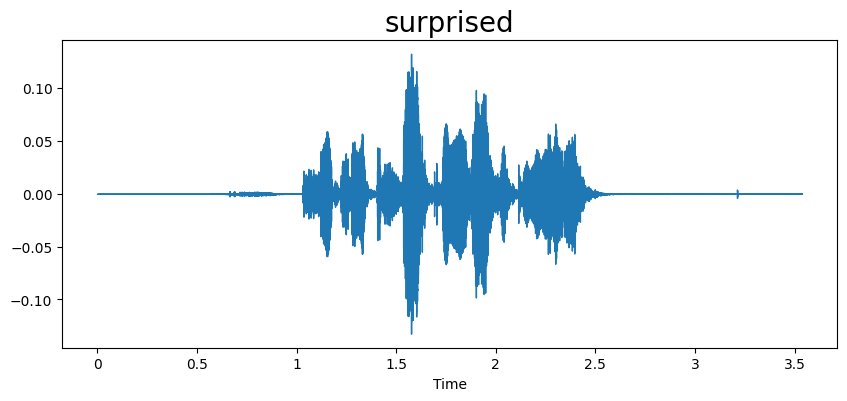

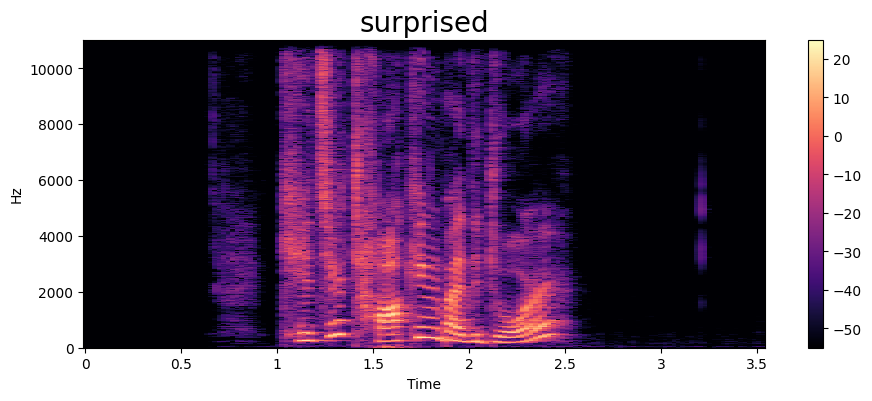

In [20]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Calmness Emotion Waves

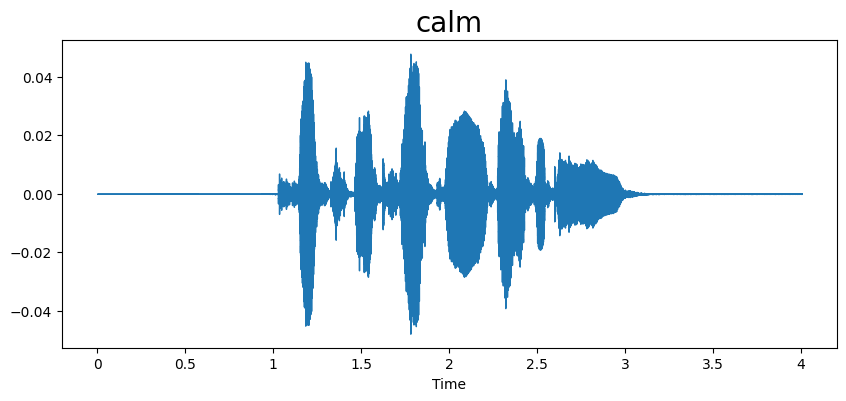

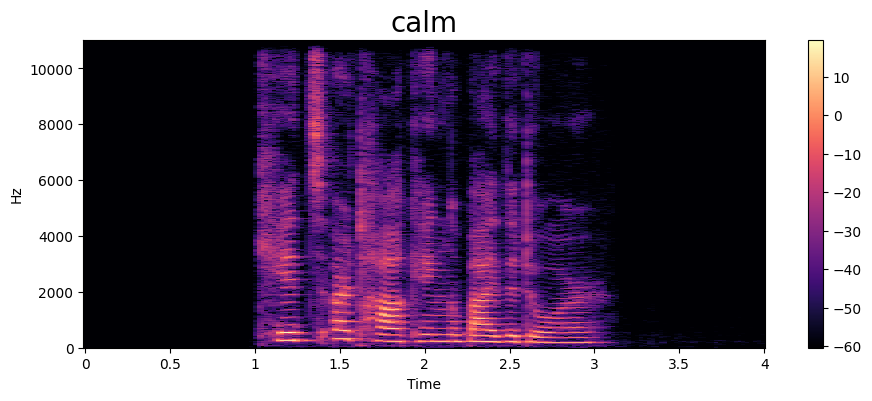

In [21]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

### Testing audios and Creating Waveshow

In [23]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

#### Original audio

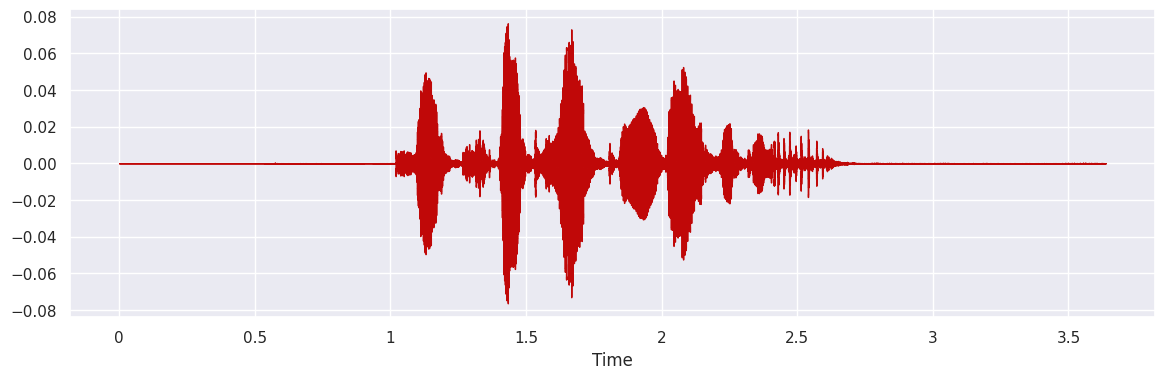

In [35]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate, color='#C00808')
Audio(path)

#### Audio with noise

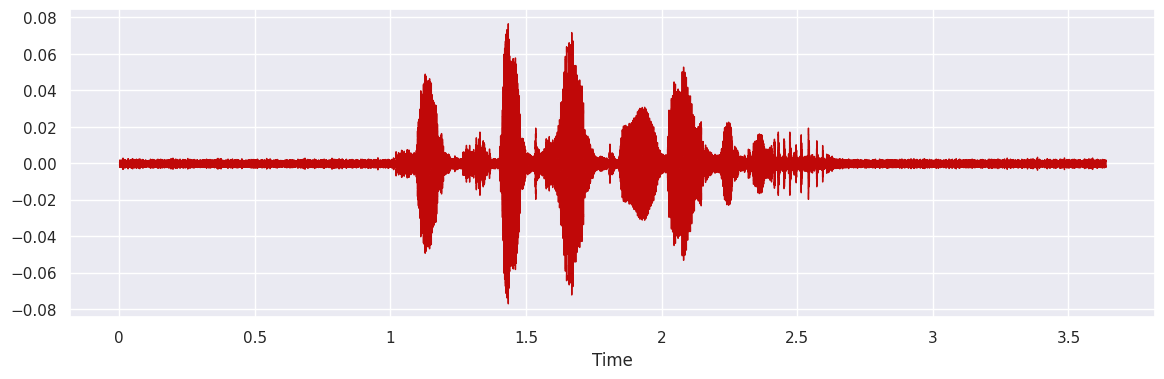

In [36]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color='#C00808')
Audio(x, rate=sample_rate)

#### Reduced noise

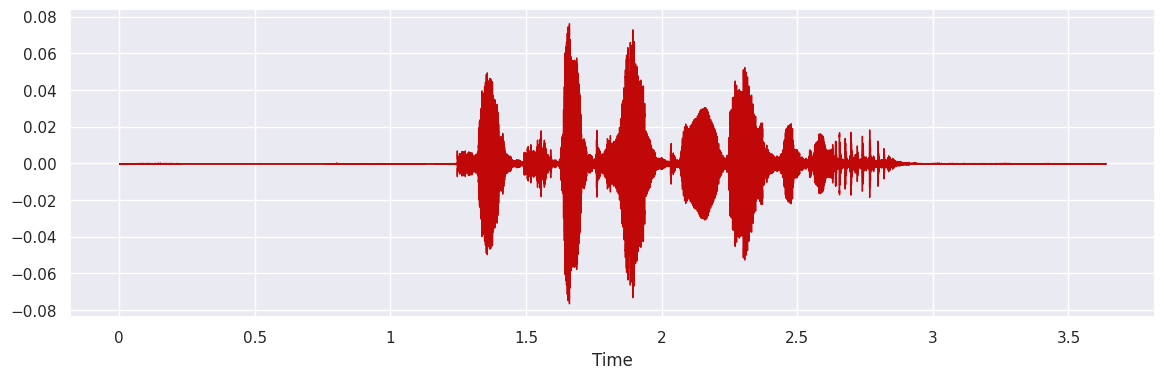

In [37]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color='#C00808')
Audio(x, rate=sample_rate)

# **--------------------------------------------Thank You--------------------------------------------**